In [19]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
# Load the preprocessed data
df = pd.read_csv('data/preprocessed_combined_dataset.csv', low_memory=False)

# Display basic information about the dataset
print(df.head())
print(df.info())


    order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  2020-01-10  received   574772   oasis_Oasis-064-36          4.5   
1  100354678  2020-01-10  received   574774      Fantastic_FT-48          4.5   
2  100354680  2020-01-10  complete   574777      mdeal_DMC-610-8          4.5   
3  100354680  2020-01-10  complete   574779   oasis_Oasis-061-36          4.5   
4  100367357         NaN  received   595185  MEFNAR59C38B6CA08CD          2.0   

   price_x   value  discount_amount   total  ... productURL stars reviews  \
0     89.9  1798.0              0.0  1798.0  ...        NaN   NaN     NaN   
1     19.0   190.0              0.0   190.0  ...        NaN   NaN     NaN   
2    149.9  1199.2              0.0  1199.2  ...        NaN   NaN     NaN   
3     79.9   639.2              0.0   639.2  ...        NaN   NaN     NaN   
4     99.9    99.9              0.0    99.9  ...        NaN   NaN     NaN   

   price_y  listPrice category_id  isBestSeller bo

In [23]:
# Select independent variables (features) and dependent variable (target)
features = df[['price_x', 'reviews', 'discount_amount']].copy()  # Adjust column names as needed
target = df['qty_ordered'].copy()

# Handle missing values by filling them with the median
features.fillna(features.median(), inplace=True)
target.fillna(target.median(), inplace=True)


In [25]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [29]:
# Check for missing values in training data
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Fill missing values in X_train with the median (or use other strategies)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


Missing values in X_train:
price_x                 0
reviews            200474
discount_amount         0
dtype: int64


In [31]:
# Drop rows with any missing values in X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train matches the indices of X_train


In [35]:
print("Number of rows in X_train before dropping NaNs:", len(X_train))
print("Number of rows in y_train before dropping NaNs:", len(y_train))

# Check if there are still any NaNs left
print("Missing values in X_train after processing:")
print(X_train.isnull().sum())


Number of rows in X_train before dropping NaNs: 0
Number of rows in y_train before dropping NaNs: 0
Missing values in X_train after processing:
price_x            0
reviews            0
discount_amount    0
dtype: int64


In [39]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Check the number of rows in the training set
print("Number of rows in X_train after splitting:", len(X_train))
print("Number of rows in y_train after splitting:", len(y_train))


Number of rows in X_train after splitting: 200474
Number of rows in y_train after splitting: 200474


In [41]:
# Fill missing values in the full dataset before splitting
features.fillna(features.median(), inplace=True)
target.fillna(target.median(), inplace=True)

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Check the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (200474, 3)
Shape of y_train: (200474,)


In [47]:
# Drop the 'reviews' column from the features
X_train = X_train.drop(columns=['reviews'])
X_test = X_test.drop(columns=['reviews'])


In [49]:
# Train the model after removing the 'reviews' column
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [-0.00044704  0.00077803]
Intercept: 2.637614824765364


In [51]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.7337648743902266
R-squared (R²): 0.14337793387016506


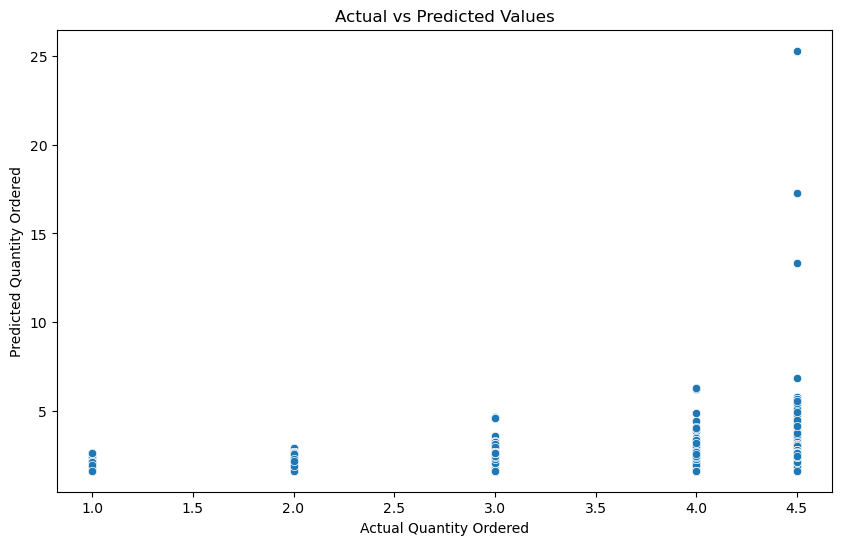

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Quantity Ordered')
plt.ylabel('Predicted Quantity Ordered')
plt.title('Actual vs Predicted Values')
plt.show()


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
df = pd.read_csv('data/preprocessed_combined_dataset.csv', low_memory=False)
print(df.dtypes)


order_id              object
order_date            object
status                object
item_id                int64
sku                   object
                      ...   
category_id          float64
isBestSeller         float64
boughtInLastMonth    float64
id                   float64
category_name        float64
Length: 68, dtype: object


In [85]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')  # Convert to datetime, handle errors
df['status'] = df['status'].astype(str)  # Convert to string
df['sku'] = df['sku'].astype(str)  # Convert to string


In [87]:
df = df.apply(lambda col: col.astype(str) if col.dtypes == 'object' else col)


In [89]:
df = pd.read_csv('data/preprocessed_combined_dataset.csv', low_memory=False)


In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [93]:
df = pd.read_csv('data/preprocessed_combined_dataset.csv', low_memory=False)


In [95]:
numerical_features = df.select_dtypes(include=['number'])


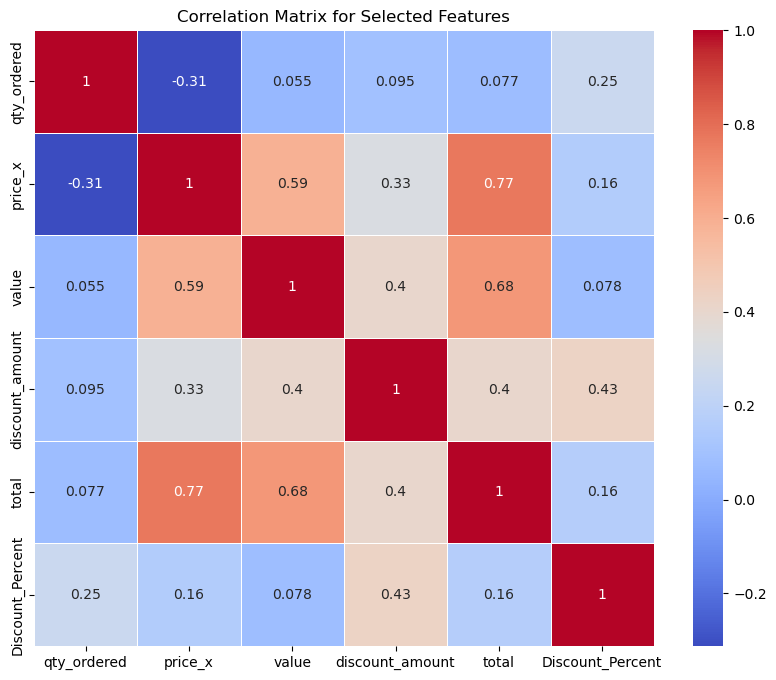

In [101]:
# Select specific columns for a focused correlation matrix
selected_features = ['qty_ordered', 'price_x', 'value', 'discount_amount', 'total', 'Discount_Percent']

# Create a correlation matrix for the selected features
focused_correlation_matrix = df[selected_features].corr()

# Plot the heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(focused_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Selected Features')
plt.show()
